In [ ]:
import pandas as pd
df = pd.read_csv(r'LK.csv')
import pandas as pd
import numpy as np
from pgmpy.estimators import K2Score
from pgmpy.models import BayesianModel
from IPython.display import display
from pgmpy.inference import BeliefPropagation
from pgmpy.inference import VariableElimination
from pgmpy.estimators import BayesianEstimator
from pgmpy.estimators import MaximumLikelihoodEstimator
import networkx as nx

In [ ]:
!pip install pgmpy

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Convexity', 'Circularity', 'X_start', 'Y_start',
       'Width', 'Height', 'Segmented_label'],
      dtype='object')

In [ ]:
df

,Area,Perimeter,Convexity,Circularity,X_start,Y_start,Width,Height,Segmented_label
0,139.5,51.213203,False,0.668375,58,122,9,23,0
1,4597.5,323.948265,False,0.550529,53,84,87,94,0
2,1320.0,147.681239,False,0.760559,54,98,37,57,0
3,1532.5,165.580735,False,0.702410,53,94,38,65,0
4,1684.5,184.066014,False,0.624789,53,90,41,74,0
...,...,...,...,...,...,...,...,...,...
1197,1915.5,213.379725,False,0.528671,152,115,61,68,0
1198,1759.5,217.379723,False,0.467909,151,114,60,69,0
1199,1524.0,209.480228,False,0.436424,150,115,59,67,0
1200,936.5,139.781745,False,0.602305,150,143,49,36,0


In [ ]:
from sklearn import preprocessing 
# 0 for false 1 for true  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Convexity']= label_encoder.fit_transform(df['Convexity']) 
  
df['Convexity'].unique() 

array([0, 1])

In [ ]:
df=df.drop(columns='X_start')

In [ ]:
df=df.drop(columns='Y_start')

In [ ]:
df

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,139.5,51.213203,0,0.668375,9,23,0
1,4597.5,323.948265,0,0.550529,87,94,0
2,1320.0,147.681239,0,0.760559,37,57,0
3,1532.5,165.580735,0,0.702410,38,65,0
4,1684.5,184.066014,0,0.624789,41,74,0
...,...,...,...,...,...,...,...
1197,1915.5,213.379725,0,0.528671,61,68,0
1198,1759.5,217.379723,0,0.467909,60,69,0
1199,1524.0,209.480228,0,0.436424,59,67,0
1200,936.5,139.781745,0,0.602305,49,36,0


In [ ]:
df.Segmented_label.unique()

array([0, 1])

In [ ]:
from pgmpy.models import BayesianModel
model = BayesianModel([('Area','Circularity'),('Perimeter','Circularity'),('Area','Convexity'),('Perimeter','Convexity'),('Circularity','Segmented_label'),('Convexity','Segmented_label'),('Width','Area'),('Height','Area')])

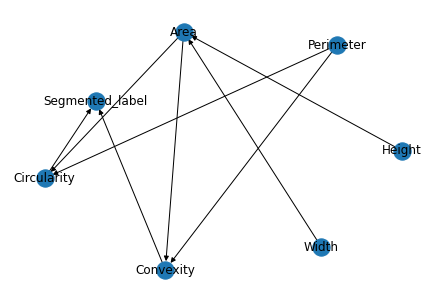

In [ ]:
nx.draw(model,with_labels=True)

**Hill Climbing Algorithm Before ranging the values (Takes a lot of time)** 

In [ ]:
import networkx as nx
import pylab as plt
def drawModel(model):
    nx.draw(model, with_labels=True)

In [ ]:
from pgmpy.estimators import HillClimbSearch

hc = HillClimbSearch(df, scoring_method=K2Score(df))
best_model = hc.estimate(max_indegree= 1)

KeyboardInterrupt: ignored

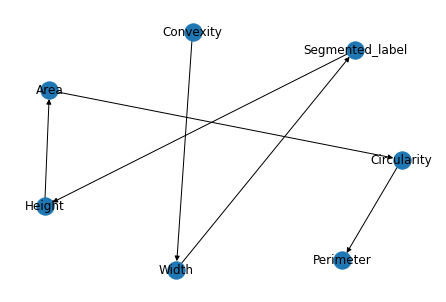

In [ ]:
drawModel(best_model)

**Area Distribution**

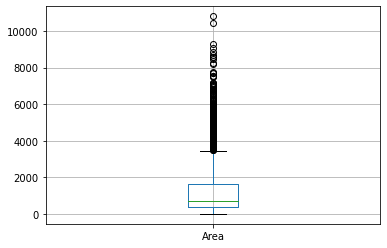

In [ ]:
df.boxplot('Area')

In [ ]:
ranges = [-1,250,500,750,1000,2000,5000,15000]
df['Area'].groupby(pd.cut(df.Area, ranges)).count()

Area
(-1, 250]        179
(250, 500]       204
(500, 750]       256
(750, 1000]      122
(1000, 2000]     188
(2000, 5000]     151
(5000, 15000]    102
Name: Area, dtype: int64

In [ ]:
labels_Area = [0,1,2,3,4,5,6]

**Perimeter Distribution**

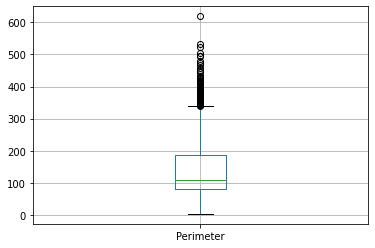

In [ ]:
df.boxplot('Perimeter')

In [ ]:
ranges_peri = [-1,75,100,125,200,700]
df['Perimeter'].groupby(pd.cut(df.Perimeter, ranges_peri)).count()

Perimeter
(-1, 75]      238
(75, 100]     268
(100, 125]    198
(125, 200]    228
(200, 700]    270
Name: Perimeter, dtype: int64

In [ ]:
labels_Peri = [0,1,2,3,4]

**Circularity Distribution**

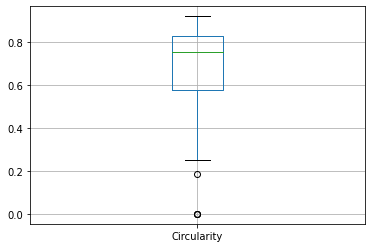

In [ ]:
df.boxplot('Circularity')

In [ ]:
ranges_cir = [-1,0.6,0.8,1]
df['Circularity'].groupby(pd.cut(df.Circularity, ranges_cir)).count()

Circularity
(-1.0, 0.6]    351
(0.6, 0.8]     400
(0.8, 1.0]     451
Name: Circularity, dtype: int64

In [ ]:
labels_Circ = [0,1,2]

**Height Distribution**


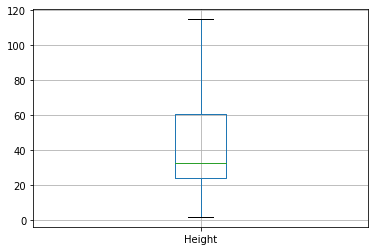

In [ ]:
df.boxplot('Height')

In [ ]:
df3=df.copy()
ranges_hei = [-1,30,60,90,120]
df3['Height'].groupby(pd.cut(df3.Height, ranges_hei)).count()

Height
(-1, 30]     510
(30, 60]     381
(60, 90]     227
(90, 120]     84
Name: Height, dtype: int64

In [ ]:
labels_Height = [0,1,2,3]

**Width Distribution**

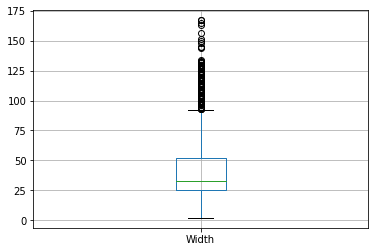

In [ ]:
df.boxplot('Width')

In [ ]:
df3=df.copy()
ranges_wid = [-1,43,86,129,172]
df3['Width'].groupby(pd.cut(df3.Width, ranges_wid)).count()

Width
(-1, 43]      823
(43, 86]      229
(86, 129]     126
(129, 172]     24
Name: Width, dtype: int64

In [ ]:
labels_Width = [0,1,2,3]

In [ ]:
df1 = df.copy()

In [ ]:
df1['Area'] = pd.cut(df1['Area'], bins=ranges, labels=labels_Area, include_lowest=True)

In [ ]:
df1['Perimeter'] = pd.cut(df1['Perimeter'], bins=ranges_peri, labels=labels_Peri, include_lowest=True)

In [ ]:
df1['Circularity'] = pd.cut(df1['Circularity'], bins=ranges_cir, labels=labels_Circ, include_lowest=True)

In [ ]:
df1['Height'] = pd.cut(df1['Height'], bins=ranges_hei, labels=labels_Height, include_lowest=True)

In [ ]:
df1['Width'] = pd.cut(df1['Width'], bins=ranges_wid, labels=labels_Width, include_lowest=True)

In [ ]:
df1

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0
...,...,...,...,...,...,...,...
1197,4,4,0,0,1,2,0
1198,4,4,0,0,1,2,0
1199,4,4,0,0,1,2,0
1200,3,3,0,1,1,1,0


In [ ]:
df1.Area.unique()

[0, 5, 4, 6, 2, 1, 3]
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [ ]:
df1.Perimeter.unique()

[0, 4, 3, 2, 1]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [ ]:
df1.Circularity.unique()

[1, 0, 2]
Categories (3, int64): [0 < 1 < 2]

In [ ]:
df1.Convexity.unique()

array([0, 1])

In [ ]:
df1.head()

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0


**Upsampling**

In [ ]:
X_data = df1[['Area','Perimeter','Convexity','Circularity','Width','Height']]
Y_data = df1['Segmented_label']
from imblearn.over_sampling import RandomOverSampler, SMOTE
rus = RandomOverSampler(random_state = 42)
X_res, y_res = rus.fit_resample(X_data, Y_data)
  
X_res = pd.DataFrame(X_res)
Y_res = pd.DataFrame(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_res.columns=['Area','Perimeter','Convexity','Circularity','Width','Height']

In [ ]:
X_res['Segmented_label']=Y_res

In [ ]:
import collections
counter3=collections.Counter(X_res['Segmented_label'])
print(counter3)

Counter({0: 934, 1: 934})


The following generated model changed as the varaibles have been reduced to a range of values.

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
model.fit(df1, estimator=MaximumLikelihoodEstimator)

In [ ]:
print(model.get_cpds('Area'))

+---------+----------------------+-----------+---------------------+---------------------+---------------------+---------------------+-----------+---------------------+--------------------+----------------------+-----------+-----------+---------------------+---------------------+---------------------+-----------+
| Height  | Height(0)            | Height(0) | Height(0)           | Height(0)           | Height(1)           | Height(1)           | Height(1) | Height(1)           | Height(2)          | Height(2)            | Height(2) | Height(2) | Height(3)           | Height(3)           | Height(3)           | Height(3) |
+---------+----------------------+-----------+---------------------+---------------------+---------------------+---------------------+-----------+---------------------+--------------------+----------------------+-----------+-----------+---------------------+---------------------+---------------------+-----------+
| Width   | Width(0)             | Width(1)  | Width(2)

In [ ]:
print(model.get_cpds('Perimeter'))

+--------------+----------+
| Perimeter(0) | 0.198003 |
+--------------+----------+
| Perimeter(1) | 0.222962 |
+--------------+----------+
| Perimeter(2) | 0.164725 |
+--------------+----------+
| Perimeter(3) | 0.189684 |
+--------------+----------+
| Perimeter(4) | 0.224626 |
+--------------+----------+


In [ ]:
print(model.get_cpds('Convexity'))

+--------------+---------------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+
| Area         | Area(0)             | Area(0)      | Area(0)      | Area(0)      | Area(0)      | Area(1)      | Area(1)      | Area(1)      | Area(1)      | Area(1)      | Area(2)      | Area(2)      | Area(2)      | Area(2)      | Area(2)      | Area(3)      | Area(3)      | Area(3)      | Area(3)      | Area(3)      | Area(4)      | Area(4)      | Area(4)      | Area(4)      | Area(4)      | Area(5)      | Area(5)      | Area(5)      | Area(5)

In [ ]:
print(model.get_cpds('Segmented_label'))

+--------------------+---------------------+----------------+---------------------+--------------------+--------------------+----------------+
| Circularity        | Circularity(0)      | Circularity(0) | Circularity(1)      | Circularity(1)     | Circularity(2)     | Circularity(2) |
+--------------------+---------------------+----------------+---------------------+--------------------+--------------------+----------------+
| Convexity          | Convexity(0)        | Convexity(1)   | Convexity(0)        | Convexity(1)       | Convexity(0)       | Convexity(1)   |
+--------------------+---------------------+----------------+---------------------+--------------------+--------------------+----------------+
| Segmented_label(0) | 0.5783475783475783  | 0.5            | 0.7934508816120907  | 0.6666666666666666 | 0.9954337899543378 | 1.0            |
+--------------------+---------------------+----------------+---------------------+--------------------+--------------------+----------------+

In [ ]:
print(model.get_cpds('Circularity'))

+----------------+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+--------------+--------------+--------------------+--------------------+--------------------+---------------------+---------------------+--------------+--------------------+--------------------+--------------------+---------------------+--------------+--------------------+--------------------+--------------------+--------------+---------------------+--------------+--------------------+--------------------+--------------------+--------------+---------------------+--------------------+--------------------+--------------------+--------------------+---------------------+
| Area           | Area(0)             | Area(0)      | Area(0)            | Area(0)            | Area(0)            | Area(1)             | Area(1)      | Area(1)      | Area(1)            | Area(1)            | Area(2)            | Area(2)             | Area(2)             | Area(2) 

In [ ]:
model.get_independencies()

(Area _|_ Perimeter)
(Area _|_ Perimeter | Height)
(Area _|_ Perimeter | Width)
(Area _|_ Perimeter | Width, Height)
(Area _|_ Segmented_label | Convexity, Circularity)
(Area _|_ Segmented_label | Convexity, Circularity, Height)
(Area _|_ Segmented_label | Width, Circularity, Convexity)
(Area _|_ Segmented_label | Convexity, Perimeter, Circularity)
(Area _|_ Segmented_label | Width, Convexity, Circularity, Height)
(Area _|_ Segmented_label | Convexity, Perimeter, Circularity, Height)
(Area _|_ Segmented_label | Width, Perimeter, Circularity, Convexity)
(Area _|_ Segmented_label | Height, Width, Convexity, Perimeter, Circularity)
(Circularity _|_ Width, Height | Area)
(Circularity _|_ Width | Area, Height)
(Circularity _|_ Width, Height | Area, Convexity)
(Circularity _|_ Height | Area, Width)
(Circularity _|_ Width, Height, Convexity | Area, Perimeter)
(Circularity _|_ Width, Height | Area, Segmented_label)
(Circularity _|_ Width | Area, Convexity, Height)
(Circularity _|_ Width, Conve

In [ ]:
# print(model.get_cpds('Segmented_label'))

In [ ]:
# df.head

In [ ]:
# df.to_csv('New_chaos.csv')

In [ ]:
model.edges()

OutEdgeView([('Area', 'Circularity'), ('Area', 'Convexity'), ('Circularity', 'Segmented_label'), ('Perimeter', 'Circularity'), ('Perimeter', 'Convexity'), ('Convexity', 'Segmented_label'), ('Width', 'Area'), ('Height', 'Area')])

**Variable Elimination**

**Converting Segmented Label into a binary liver/non liver problem. Here Liver is denoted as 1 and non liver as 0**

In [ ]:
from pgmpy.inference import VariableElimination
varel= VariableElimination(model)
df2=X_res.copy()
df2

,Area,Perimeter,Convexity,Circularity,Width,Height,Segmented_label
0,0,0,0,1,0,0,0
1,5,4,0,0,2,3,0
2,4,3,0,1,0,1,0
3,4,3,0,1,0,2,0
4,4,3,0,1,0,2,0
...,...,...,...,...,...,...,...
1863,2,1,0,2,0,0,1
1864,4,3,0,2,1,1,1
1865,3,2,0,1,0,0,1
1866,2,1,0,2,0,0,1


In [ ]:
X_res.drop(['Segmented_label'],inplace = True,axis =1)

In [ ]:
X_res

,Area,Perimeter,Convexity,Circularity,Width,Height
0,0,0,0,1,0,0
1,5,4,0,0,2,3
2,4,3,0,1,0,1
3,4,3,0,1,0,2
4,4,3,0,1,0,2
...,...,...,...,...,...,...
1863,2,1,0,2,0,0
1864,4,3,0,2,1,1
1865,3,2,0,1,0,0
1866,2,1,0,2,0,0


In [ ]:
prediction=model.predict(X_res)

100%|██████████| 84/84 [00:04<00:00, 19.46it/s]


Count of prediction values

In [ ]:
import collections
counter=collections.Counter(prediction['Segmented_label'])
print(counter)

Counter({0: 1938})


Count of actual values

In [ ]:
counter2=collections.Counter(df2['Segmented_label'])
print(counter2)

Counter({0: 969, 1: 969})


In [ ]:
counter.keys

dict_keys([0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(df2['Segmented_label'],prediction['Segmented_label'])

0.5

In [ ]:
evid = X_res.to_dict(orient = 'records')
query = []
for i in range(len(evid)):
    query.append(varel.map_query(variables = ['Segmented_label'], evidence = evid[i])['Segmented_label'])

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it

In [ ]:
acc = (float)((query == df2['Segmented_label']).sum()/len(query))*100
print ("Accuracy = " + str(acc))

Accuracy = 50.0


In [ ]:
len(df2['Segmented_label'])

1202